In [1]:
# import libraries & modules
import numpy as np
import pandas as pd
import body_class
import create_vars_fcns
import update_vars_fcns

In [3]:
# read in data
data = pd.read_csv('input_data.csv')

In [5]:
# convert position/velocity data to meters, convert all data to numpy array
data.iloc[:,2:8] = data.iloc[:,2:8]*1000
data = np.array(data)

In [7]:
# define all 9 bodies as members of body class (*1000 to go km-->m)
sun = body_class.Body(mass = data[0,1], initial_pos = [data[0,2],data[0,3],data[0,4]], initial_vel = [data[0,5],data[0,6],data[0,7]])
merc = body_class.Body(mass = data[1,1], initial_pos = [data[1,2],data[1,3],data[1,4]], initial_vel = [data[1,5],data[1,6],data[1,7]])
ven = body_class.Body(mass = data[2,1], initial_pos = [data[2,2],data[2,3],data[2,4]], initial_vel = [data[2,5],data[2,6],data[2,7]])
earth =body_class.Body(mass = data[3,1], initial_pos = [data[3,2],data[3,3],data[3,4]], initial_vel = [data[3,5],data[3,6],data[3,7]])
mars = body_class.Body(mass = data[4,1], initial_pos = [data[4,2],data[4,3],data[4,4]], initial_vel = [data[4,5],data[4,6],data[4,7]])
jupit = body_class.Body(mass = data[5,1], initial_pos = [data[5,2],data[5,3],data[5,4]], initial_vel = [data[5,5],data[5,6],data[5,7]])
saturn = body_class.Body(mass = data[6,1], initial_pos = [data[6,2],data[6,3],data[6,4]], initial_vel = [data[6,5],data[6,6],data[6,7]])
uranus = body_class.Body(mass = data[7,1], initial_pos = [data[7,2],data[7,3],data[7,4]], initial_vel = [data[7,5],data[7,6],data[7,7]])
nept = body_class.Body(mass = data[8,1], initial_pos = [data[8,2],data[8,3],data[8,4]], initial_vel = [data[8,5],data[8,6],data[8,7]])

In [9]:
# define bodies as objects list
bodies_as_objects_list = [sun, merc, ven, earth, mars, jupit, saturn, uranus, nept]

## Create & Initialise Necessary Variables

In [12]:
# May need to be run more than once in case of Nan's
between_body_position_vector_array = create_vars_fcns.create_3d_between_body_position_vector_array(bodies_as_objects_list) #shape (9, 9, 3, 18262). (in meters)
between_body_unit_vector_array = create_vars_fcns.create_3d_between_body_unit_vector_array(between_body_position_vector_array) #shape (9, 9, 3, 18262) #SOMETIMES THIS PRODUCES NANS INSTEAD OF REAL VALUES
between_body_force_vector_array = create_vars_fcns.create_3d_between_body_force_vector_array(bodies_as_objects_list, between_body_position_vector_array, between_body_unit_vector_array) #(9, 9, 3, 18262)
total_Force_acting_on_array = create_vars_fcns.create_3d_total_Force_acting_on_array(between_body_force_vector_array) #shape (9, 3, 18262). (in m/kg/s-2)
acceleration_vector_array = create_vars_fcns.create_3d_accelerations_vector_array(bodies_as_objects_list, total_Force_acting_on_array) #shape (9, 3, 18262)

In [14]:
# check for Nan's
print(between_body_position_vector_array[0,1,:,0])
print(between_body_unit_vector_array[0,1,:,0])
print(total_Force_acting_on_array[1,:,0])
print(acceleration_vector_array[1,:,0])

[-3.97604580e+10 -5.56645515e+10 -9.01156109e+08]
[-0.58118839 -0.81366243 -0.01317242]
[5.44006368e+21 7.61597186e+21 1.23296740e+20]
[0.01648504 0.0230787  0.00037363]


## Main Verlet Leap Frog Simulation

In [17]:
def orbits(duration_in_years, list_of_bodies):
    
    """
    Models the orbits of a list of body-type objects over a given number of years in 3D, where the bodies are initialised with position/velocity values in meters.
    Args:   duration_in_years (float): Number of years for the model to run over
            list_of_bodies (list): List of body-type objects to be modelled
    Returns:null
            x/y/z values for between_body_position_vector_array, between_body_unit_vector_array, total_Force_acting_on_array, acceleration_vector_array and 
            vel_3d_array (velocity) and calcuated at each time step

    """
    
    #convert user input to seconds
    duration_in_seconds = duration_in_years * 31536000
    time_step = 86400 #in seconds, equivalent to 1 day
    time = np.arange(0, duration_in_seconds, time_step)
    ntime = len(time)
    
    for i in np.array(range(ntime-1)): #[0,1,...18247,18248]
        
        #find new positions & copy back to series
        update_vars_fcns.find_new_3d_positions(i,list_of_bodies,acceleration_vector_array)
        for body_index in np.array((range(9))):
            list_of_bodies[body_index].xpos_1d_series[i+1] = list_of_bodies[body_index].pos_3d_array[0, i+1]
            list_of_bodies[body_index].ypos_1d_series[i+1] = list_of_bodies[body_index].pos_3d_array[1, i+1]
            list_of_bodies[body_index].zpos_1d_series[i+1] = list_of_bodies[body_index].pos_3d_array[2, i+1]
        
        #find new accelerations
        update_vars_fcns.find_new_between_body_position_vectors(i,list_of_bodies,between_body_position_vector_array)
        update_vars_fcns.find_new_between_body_unit_vectors(i,between_body_unit_vector_array,between_body_position_vector_array)
        update_vars_fcns.find_new_between_body_force_vectors(i,list_of_bodies,between_body_position_vector_array,between_body_unit_vector_array,between_body_force_vector_array)
        update_vars_fcns.find_new_total_Force_acting_on_vectors(i,between_body_force_vector_array,total_Force_acting_on_array)
        update_vars_fcns.find_new_acceleration_vectors(i,list_of_bodies,acceleration_vector_array,total_Force_acting_on_array)
        
        #update time
        i += 1

        #find new velocities
        update_vars_fcns.find_new_velocity_vectors(i,list_of_bodies,acceleration_vector_array)

In [19]:
orbits(50, bodies_as_objects_list)

## Scale Output Positions Data

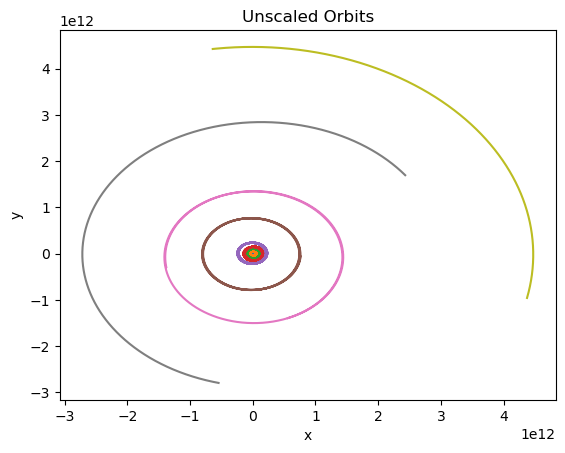

In [21]:
# visualise true positions
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
for body in bodies_as_objects_list:
    ax.plot(body.xpos_1d_series, body.ypos_1d_series)
ax.set(xlabel="x", ylabel="y", title="Unscaled Orbits")
plt.show()

In [23]:
# divide all output series positions data by 1,000,000,000 for Unity (*be sure to only run once!*)
for body in bodies_as_objects_list:
    body.xpos_1d_series = body.xpos_1d_series/1000000000
    body.ypos_1d_series = body.ypos_1d_series/1000000000
    body.zpos_1d_series = body.zpos_1d_series/1000000000

In [25]:
# divide outer planet output positions further to scale (*be sure to only run once!*)
outer_planets = {
    jupit: 2.4,
    saturn: 3.4,
    uranus: 5.2,
    nept: 7.0
}
for planet, scale in outer_planets.items():
    planet.xpos_1d_series /= scale
    planet.ypos_1d_series /= scale
    planet.zpos_1d_series /= scale

In [27]:
# ensure sun position remains stable at 0,0,0
sun.xpos_1d_series = sun.xpos_1d_series/1000
sun.ypos_1d_series = sun.ypos_1d_series/1000
sun.zpos_1d_series = sun.zpos_1d_series/1000

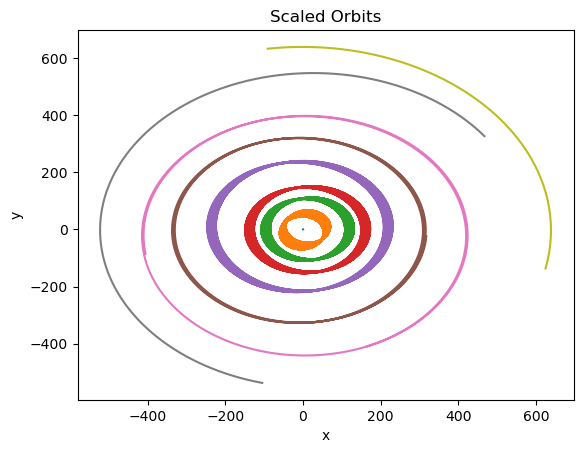

In [29]:
# visualise now-scaled positions
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
for body in bodies_as_objects_list:
    ax.plot(body.xpos_1d_series, body.ypos_1d_series)
ax.set(xlabel="x", ylabel="y", title="Scaled Orbits")
plt.show()

## Export Newly-Scaled Planet Position Data to CSVs

In [32]:
# List of planet names in the same order as they appear in bodies_as_objects_list
body_names = ["sun", "merc", "venus", "earth", "mars", "jupiter", "saturn", "uranus", "neptune"]

# Loop over each body and save its position data to a CSV
for body_index, body in enumerate(body_names):
    positions_df = pd.DataFrame({
        f"{body}_x": bodies_as_objects_list[body_index].xpos_1d_series,
        f"{body}_y": bodies_as_objects_list[body_index].ypos_1d_series,
        f"{body}_z": bodies_as_objects_list[body_index].zpos_1d_series,
    })
    positions_df.to_csv(f'output_{body}_positions.csv', encoding='utf-8', index=False)

## Visually Compare Body Volumes for Unity Visuals

Body diameters from Sun to Nept: [1391400000 4879000 12104000 12756000 6792000 142984000 120536000 51118000
 49528000]


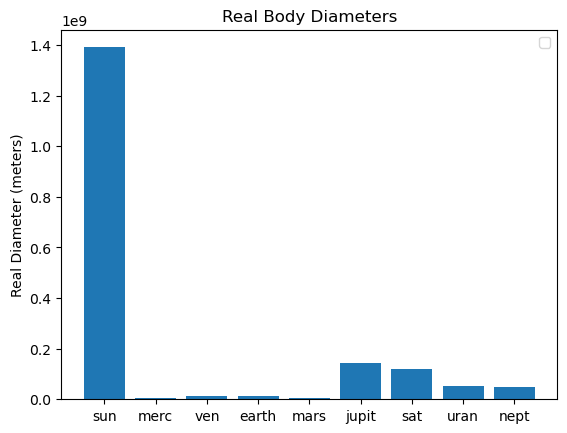

In [35]:
# get real body diameters
real_body_diameters_meters = np.array(data)[:,8]
# graph real body diameters
labels = ["sun","merc", "ven", "earth", "mars", "jupit", 'sat', 'uran', 'nept']
x = np.arange(len(labels)) # the label locations
fig, ax = plt.subplots()
planet = ax.bar(x, real_body_diameters_meters)
ax.set_ylabel("Real Diameter (meters)")
ax.set_title("Real Body Diameters")
ax.set_xticks(x)
ax.set_xticklabels(labels)
leg = ax.legend('')
print(f'Body diameters from Sun to Nept: {real_body_diameters_meters}')